This notebook contains training code for Sparse autoencoder and visualization (python 3.9.18)

Libraries:
• tensorflow 2.15.0
• keras 2.15.0
• scikit-learn 1.3.0
• matplotlib 3.7.1

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Input 
from keras.layers import Dense 
from keras.models import Model 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import sys
import os
# import matplotlib.colors as mcolors
# from tqdm import tqdm

In [5]:
tf.config.list_physical_devices('GPU')
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_visible_devices(gpus[2], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    print(e)

In [6]:
result_path = '../dataset'
model_dlp_output_test = np.load(f'{result_path}/model_dlp_output_test_1008_1H_10W.npy')
model_dlp_output_train = np.load(f'{result_path}/model_dlp_output_train_1008_1H_10W.npy')
model_dlp_output_test.shape, model_dlp_output_train.shape

((6916, 64), (27663, 64))

In [7]:
model_dlp_output_combined = np.concatenate([model_dlp_output_test, model_dlp_output_train])

In [8]:
X_train = np.copy(model_dlp_output_train)
X_test = np.copy(model_dlp_output_test)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (27663, 64)
New shape of X_test:  (6916, 64)


In [127]:
SAE_n_inputs=X_train.shape[1]
SAE_n_hidden=16 # number of z features

SAE_visible = Input(shape=(SAE_n_inputs,), name='input')
SAE_enc_hidden = Dense(units=SAE_n_hidden, activation='relu', name='e-hidden')(SAE_visible)
SAE_bottleneck = Dense(units=SAE_n_hidden, activation='relu', activity_regularizer=keras.regularizers.L1(0.0001), name='bottleneck')(SAE_enc_hidden) # bottleneck layer
SAE_dec_hidden = Dense(units=SAE_n_hidden, activation='relu', name='d-hidden')(SAE_bottleneck)
SAE_output = Dense(units=SAE_n_inputs, activation='sigmoid', name='output')(SAE_dec_hidden)

SAE_model = Model(inputs=SAE_visible, outputs=SAE_output, name='SAE')
opt = keras.optimizers.Adam(learning_rate=0.005)
SAE_model.compile(optimizer=opt, loss='mse')
print(SAE_model.summary())
SAE_history = SAE_model.fit(X_train, X_train, epochs=100, batch_size=1024, verbose=1, validation_data=(X_test, X_test))

Model: "Sparse-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SAE-Input-Layer (InputLaye  [(None, 64)]              0         
 r)                                                              


                                                                 
 SAE-Encoder-Hidden-Layer (  (None, 16)                1040      
 Dense)                                                          
                                                                 
 SAE-Bottleneck-Layer (Dens  (None, 16)                272       
 e)                                                              
                                                                 
 SAE-Decoder-Hidden-Layer (  (None, 16)                272       
 Dense)                                                          
                                                                 
 SAE-Output-Layer (Dense)    (None, 64)                1088      
                                                                 
Total params: 2672 (10.44 KB)
Trainable params: 2672 (10.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
28/28 [==================

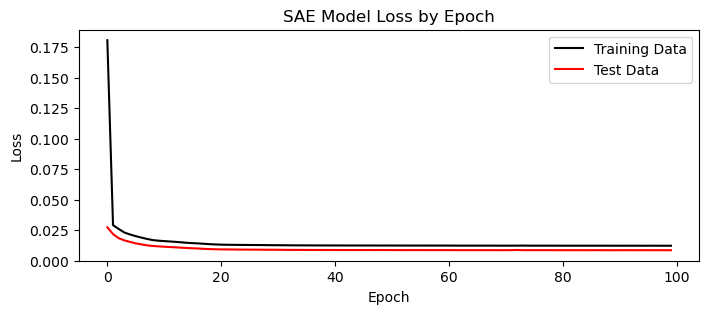

c:\Users\sclab\anaconda3\envs\xai2\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [128]:
fig, ax = plt.subplots(figsize=(8,3), dpi=80)
plt.title(label='Loss', loc='center')
ax.plot(SAE_history.history['loss'], label='Training Data', color='black')
ax.plot(SAE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()

# Define botleneck layer vector extractor
SAE_encoder = Model(inputs=SAE_visible, outputs=SAE_bottleneck)
SAE_encoder.compile(optimizer='adam', loss='mse')
# SAE_encoder.save(main_dir+'/data/SAE_encoder.h5')


In [129]:
# Extract DLPs
encoder_outputs_train = SAE_encoder.predict(X_train)
encoder_outputs_test = SAE_encoder.predict(X_test)
encoder_outputs_train.shape, encoder_outputs_test.shape

217/217 [==============================] - 0s 831us/step


((27663, 16), (6916, 16))

In [130]:
# encoder_outputs_train.shape + encoder_outputs_test.shape
# Save file
# np.save(f'{result_path}/encoder_outputs/encoder_outputs_train_1008_l1e3.npy', encoder_outputs_train)
# np.save(f'{result_path}/encoder_outputs/encoder_outputs_test_1008_l1e3.npy', encoder_outputs_test)

In [131]:
encoder_outputs_combined = np.concatenate([encoder_outputs_train, encoder_outputs_test])

## Viz

In [9]:
from sklearn.manifold import TSNE
import pandas as pd

In [12]:
y = np.load(f'{result_path}/peak_labels_1008_1H_10W.npy') 
# visualize encoder --> y_hat to capture the prediction result
len(y)

34579

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 34579 samples in 0.000s...
[t-SNE] Computed neighbors for 34579 samples in 1.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34579
[t-SNE] Computed conditional probabilities for sample 2000 / 34579
[t-SNE] Computed conditional probabilities for sample 3000 / 34579
[t-SNE] Computed conditional probabilities for sample 4000 / 34579
[t-SNE] Computed conditional probabilities for sample 5000 / 34579
[t-SNE] Computed conditional probabilities for sample 6000 / 34579
[t-SNE] Computed conditional probabilities for sample 7000 / 34579
[t-SNE] Computed conditional probabilities for sample 8000 / 34579
[t-SNE] Computed conditional probabilities for sample 9000 / 34579
[t-SNE] Computed conditional probabilities for sample 10000 / 34579
[t-SNE] Computed conditional probabilities for sample 11000 / 34579
[t-SNE] Computed conditional probabilities for sample 12000 / 34579
[t-SNE] Computed conditional probabilities for sa

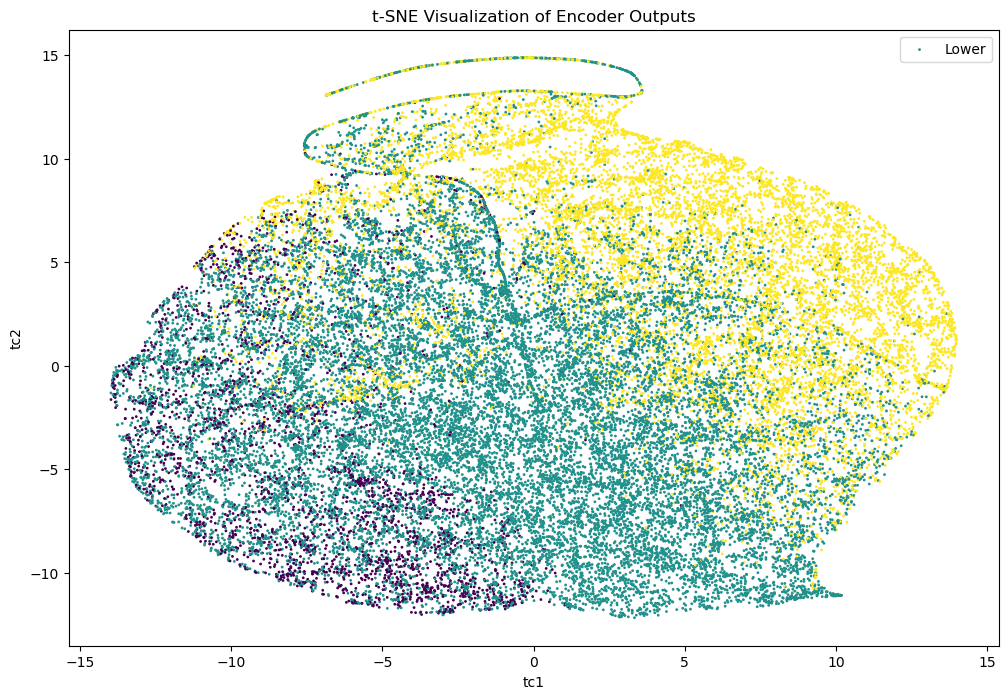

In [134]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(encoder_outputs_combined)
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap='viridis', s=1)  # s is the size of the points
plt.title('t-SNE Visualization of Encoder Outputs')
plt.legend(['Lower', 'No change', 'Higher'])
plt.xlabel('tc1')
plt.ylabel('tc2')
plt.show()

In [126]:
encoder_outputs_combined[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 34579 samples in 0.001s...
[t-SNE] Computed neighbors for 34579 samples in 1.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34579
[t-SNE] Computed conditional probabilities for sample 2000 / 34579
[t-SNE] Computed conditional probabilities for sample 3000 / 34579
[t-SNE] Computed conditional probabilities for sample 4000 / 34579
[t-SNE] Computed conditional probabilities for sample 5000 / 34579
[t-SNE] Computed conditional probabilities for sample 6000 / 34579
[t-SNE] Computed conditional probabilities for sample 7000 / 34579
[t-SNE] Computed conditional probabilities for sample 8000 / 34579
[t-SNE] Computed conditional probabilities for sample 9000 / 34579
[t-SNE] Computed conditional probabilities for sample 10000 / 34579
[t-SNE] Computed conditional probabilities for sample 11000 / 34579
[t-SNE] Computed conditional probabilities for sample 12000 / 34579
[t-SNE] Computed conditional probabilities for sa

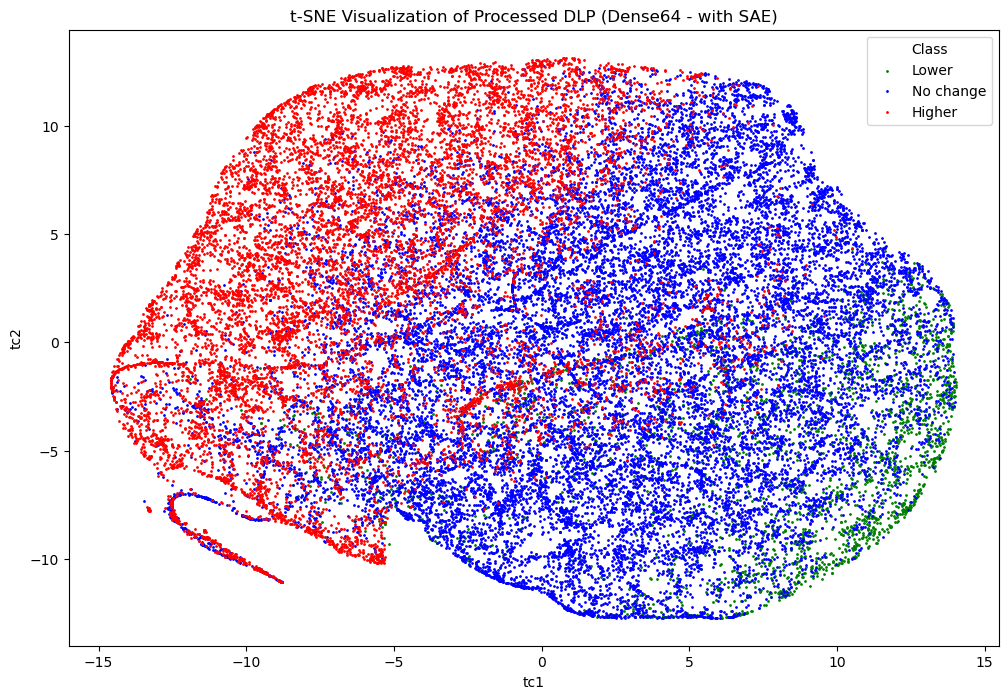

In [113]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming 'encoder_outputs_combined' is your data and 'y' are your labels

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(encoder_outputs_combined)

# Define colors and labels
colors = ['green', 'blue', 'red']  # Colors for each class
labels = ['Lower', 'No change', 'Higher']  # Labels for each class
class_values = [-1, 0, 1]  # Actual unique values in your y array

# Create the plot
plt.figure(figsize=(12, 8))

for i, class_val in enumerate(class_values):
    # Indices for points in this class
    indices = np.where(y == class_val)
    # Scatter plot for this class
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], c=colors[i], label=labels[i], s=1)

# Add legend, titles, and labels
plt.legend(title='Class')
plt.title('t-SNE Visualization of Processed DLP (Dense64 - with SAE)')
plt.xlabel('tc1')
plt.ylabel('tc2')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 34579 samples in 0.001s...
[t-SNE] Computed neighbors for 34579 samples in 1.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34579
[t-SNE] Computed conditional probabilities for sample 2000 / 34579
[t-SNE] Computed conditional probabilities for sample 3000 / 34579
[t-SNE] Computed conditional probabilities for sample 4000 / 34579
[t-SNE] Computed conditional probabilities for sample 5000 / 34579
[t-SNE] Computed conditional probabilities for sample 6000 / 34579
[t-SNE] Computed conditional probabilities for sample 7000 / 34579
[t-SNE] Computed conditional probabilities for sample 8000 / 34579
[t-SNE] Computed conditional probabilities for sample 9000 / 34579
[t-SNE] Computed conditional probabilities for sample 10000 / 34579
[t-SNE] Computed conditional probabilities for sample 11000 / 34579
[t-SNE] Computed conditional probabilities for sample 12000 / 34579
[t-SNE] Computed conditional probabilities for sa

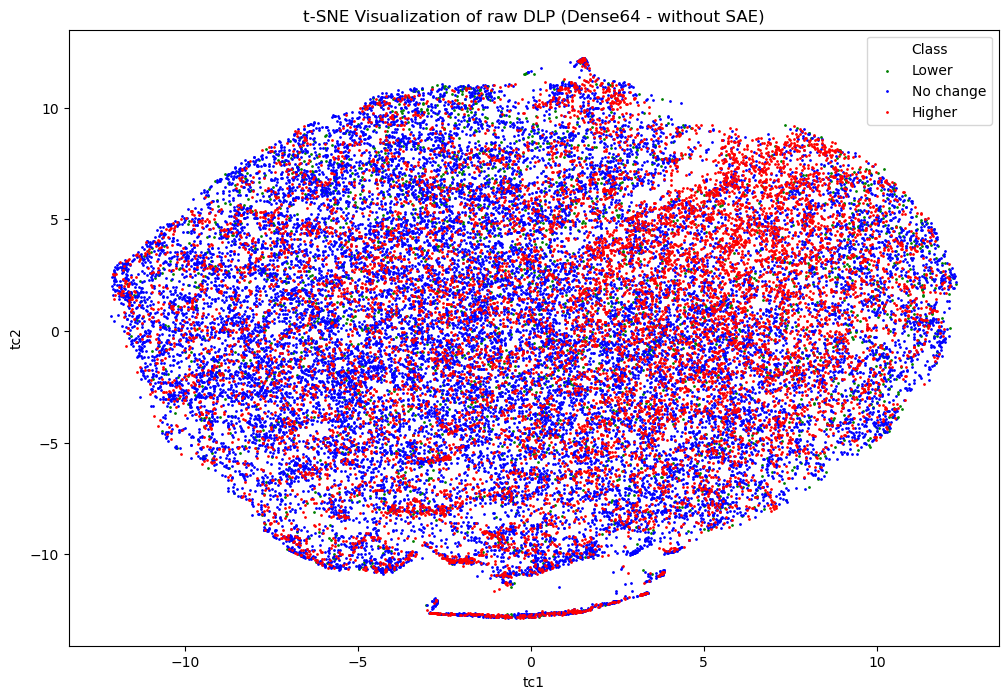

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming 'encoder_outputs_combined' is your data and 'y' are your labels

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(model_dlp_output_combined)

# Define colors and labels
colors = ['green', 'blue', 'red']  # Colors for each class
labels = ['Lower', 'No change', 'Higher']  # Labels for each class
class_values = [-1, 0, 1]  # Actual unique values in your y array

# Create the plot
plt.figure(figsize=(12, 8))

for i, class_val in enumerate(class_values):
    # Indices for points in this class
    indices = np.where(y == class_val)
    # Scatter plot for this class
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], c=colors[i], label=labels[i], s=1)

# Add legend, titles, and labels
plt.legend(title='Class')
plt.title('t-SNE Visualization of raw DLP (Dense64 - without SAE)')
plt.xlabel('tc1')
plt.ylabel('tc2')
plt.show()